## Analyzing Responses From The Stack Overflow Annual Developer Survey 2020

## 01. Uploading the Dataset

In [1]:
import pandas as pd
survey_raw_data = pd.read_csv('survey_results_public.csv')
survey_raw_data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [2]:
pd.read_csv('survey_results_schema.csv')

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [3]:
# making our dataframe a series...
schema_frame = 'survey_results_schema.csv'
schema_raw = pd.read_csv(schema_frame, index_col='Column').QuestionText
schema_raw 

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [4]:
# We can now use 'schema_raw' to retrieve the full question text for any column in 'survey_raw_df'...
schema_raw['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [5]:
'''As the survey responses contain a wealth of information, we'll limit our Analysis to the following areas:-
Demographics of the Survey-Respondents and the Global Programming Community;
Distribution of Programming Skills, Experience, and Preferences;
Employment-Related Information, preferences, and Opinions...''';

## 02. Data Preparation And Cleaning

In [6]:
# Let's select a subset of columns with the relevant data for our analysis...

selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

len(selected_columns)

20

In [7]:
'''Let's extract a copy of the data from these columns into a new data frame survey_df.
We can continue to modify further data without affecting the original data frame...'''

survey_df = survey_raw_data[selected_columns].copy()
schema = schema_raw[selected_columns]

In [8]:
# Let's view some basic information about the data frame...
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [9]:
# converting the datatype of the variables; we're going to work on...
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors= 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors= 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors= 'coerce')

# re-checking the d-type:-
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [10]:
# Let's view some basic statistics about numeric columns...
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [11]:
'''There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279.
This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding;
A simple fix is to drop them...'''

survey_df.drop(survey_df[survey_df.Age < 10].index, inplace= True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

# The same holds for 'WorkWeekHrs'. Let's ignore entries where the value for the column is higher than 140 hours. (20 hrs/day).

survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [12]:
# now again checking the statistics of the dataset after fixing it:-
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [13]:
'''The gender column also allows for picking multiple options;
We'll remove values containing more than one option to simplify our analysis...'''

print(survey_df['Gender'].value_counts())
import numpy as np
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64


In [14]:
# We've now cleaned up and prepared the dataset for analysis.

## 03. Exploratory Analysis & Visualization

In [15]:
# importing required libraries:-
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
import matplotlib

#### 01. Top-10 Countries who Responded to the Survey:-

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64


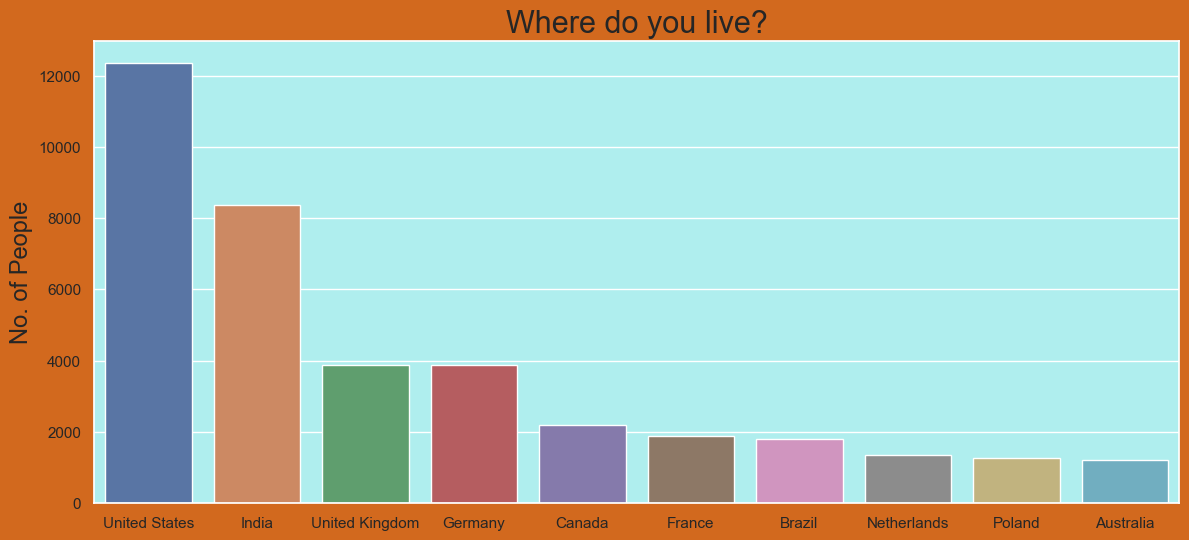

In [17]:
top_countries = (survey_df['Country'].value_counts().head(10))
print(top_countries)

# Visualizing the Results:-
plt.figure(figsize=(14,6))
sns.barplot(x = top_countries.index, y = top_countries);
sns.set(rc={'figure.facecolor':'chocolate', 'axes.facecolor':'paleturquoise'})
plt.title(schema.Country, size = 22)
plt.ylabel("No. of People", size = 17);

#### 02. The Distribution of Respondent's Age:-

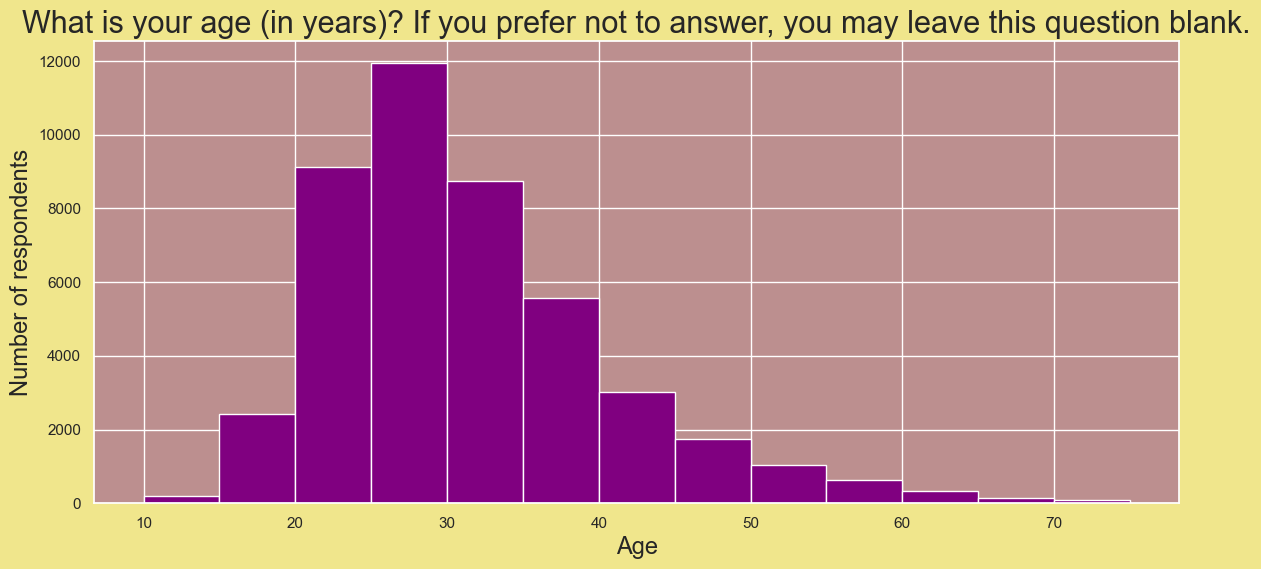

In [19]:
# Visualizing the Results:-
plt.figure(figsize=(14,6))
sns.set(rc={'axes.facecolor':'rosybrown', 'figure.facecolor':'khaki'})
plt.title(schema.Age, size = 22)
plt.xlabel('Age', size = 17)
plt.ylabel('Number of respondents', size = 17)
plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

#### 03. Let's look at the Distribution of Responses for the Gender:-

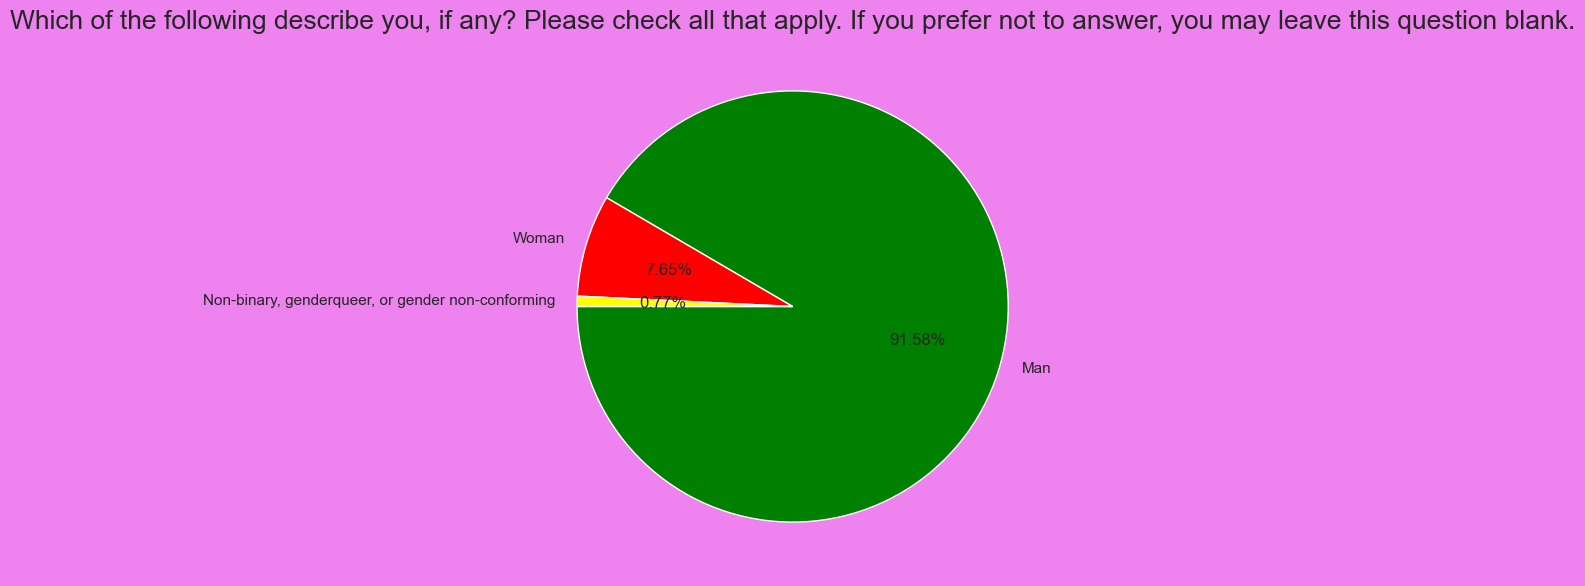

In [21]:
gender_counts = survey_df.Gender.value_counts()

# Visualizing the Results:-
plt.figure(figsize=(14,7))
sns.set(rc={'figure.facecolor':'violet'})
plt.title(schema.Gender, size = 19)
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.2f%%', startangle=180, colors=["green","red","yellow"]);

#### 04. Let's look at the Educational-Level of the Programmers:-   

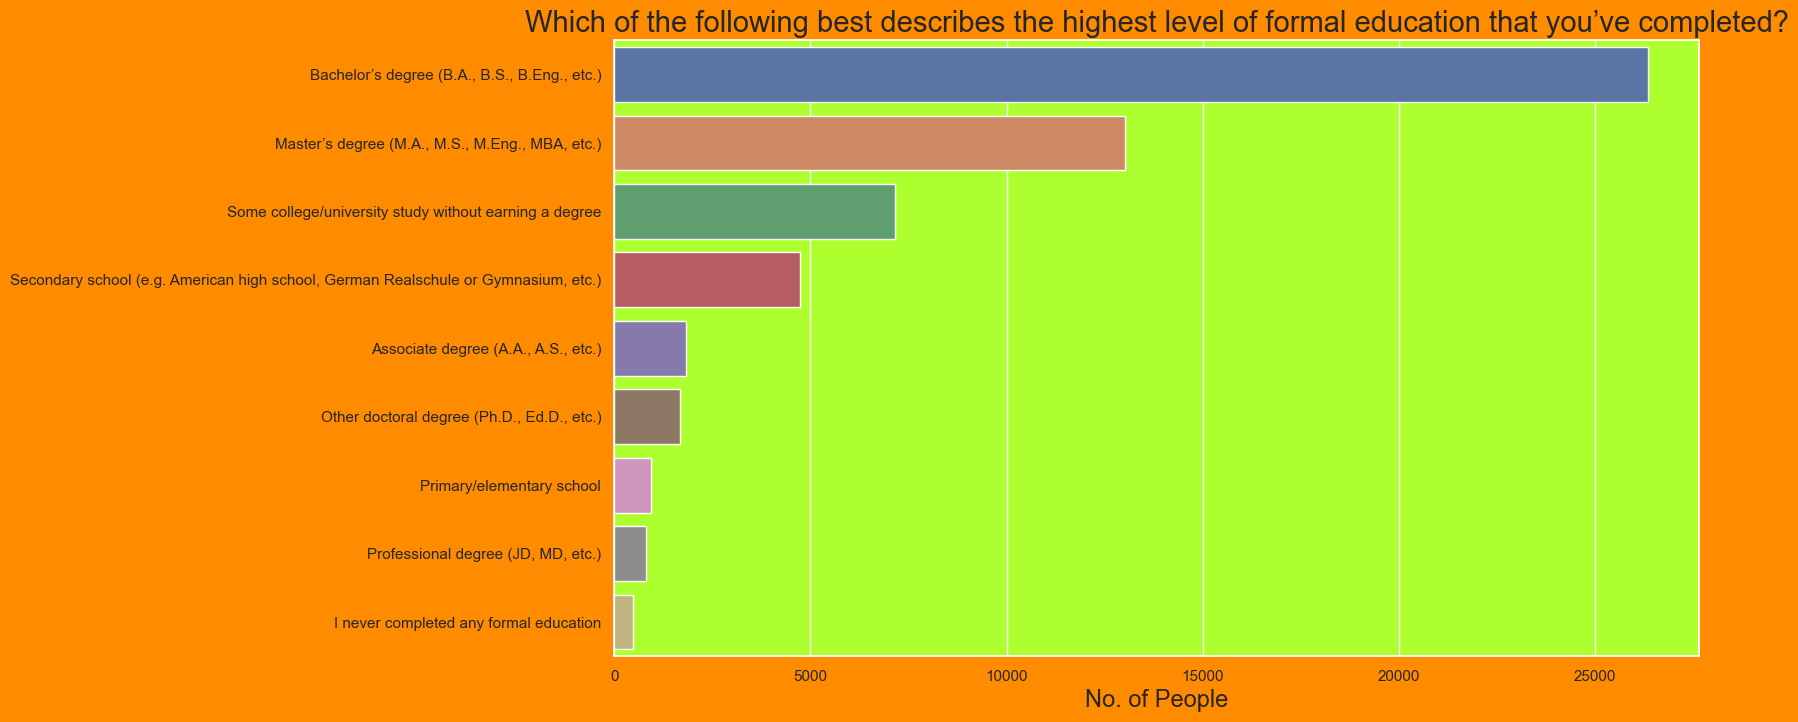

In [23]:
ed = survey_df['EdLevel'].value_counts()

# Visualizing the Results:-
plt.figure(figsize = (14,8))
sns.set(rc={'figure.facecolor':'darkorange', 'axes.facecolor':'greenyellow'})
sns.barplot(x = ed , y = ed.index)
plt.title(schema.EdLevel, size = 21)
plt.xlabel('No. of People', size = 17);

#### 05. Let's also Plot Under-Graduate Majors:-

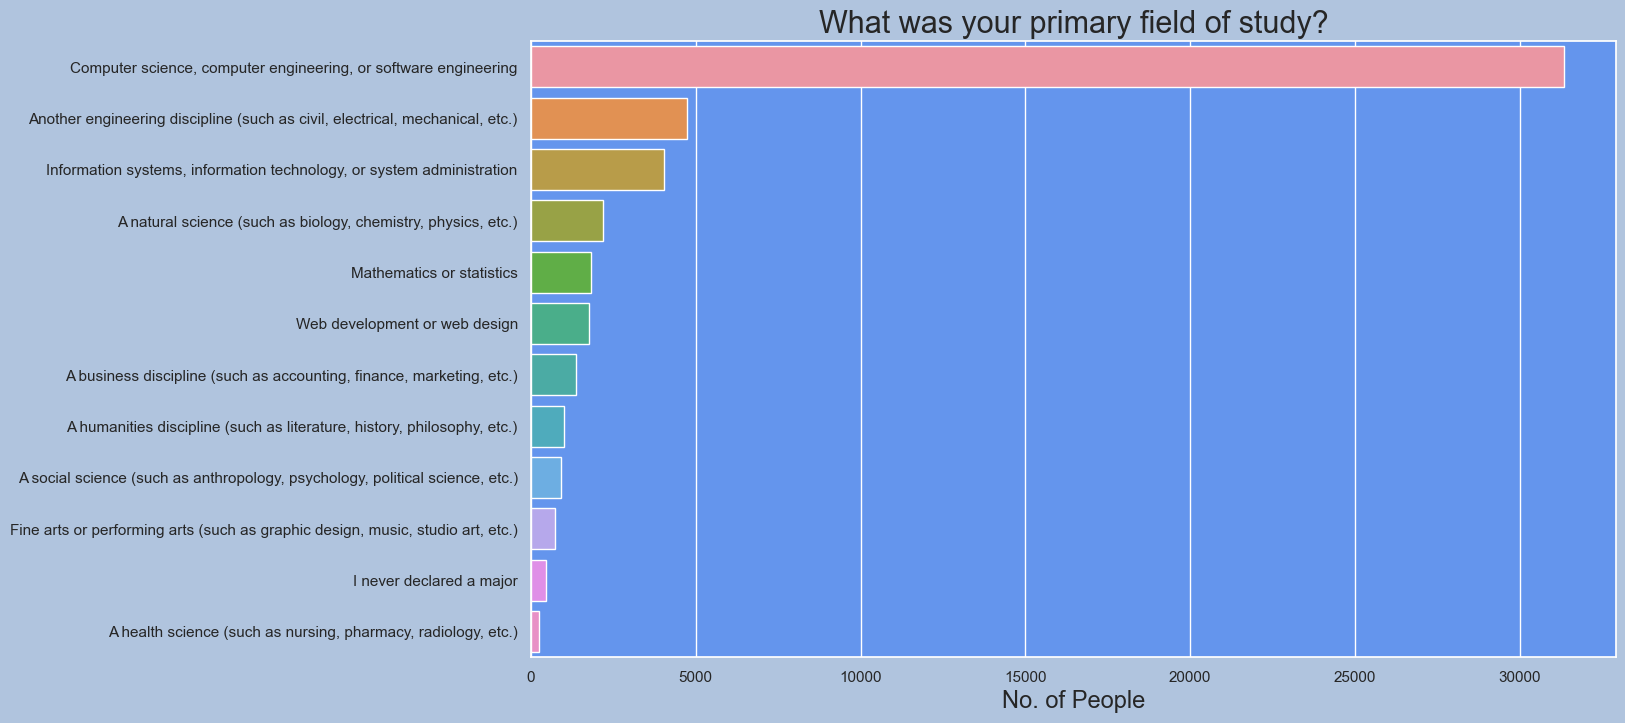

In [25]:
undr_grad = survey_df.UndergradMajor.value_counts()

# Visualizing the Results:-
plt.figure(figsize = (14,8))
sns.barplot(x = undr_grad, y = undr_grad.index)
sns.set(rc={'figure.facecolor':'lightsteelblue', 'axes.facecolor':'cornflowerblue'})
plt.title(schema.UndergradMajor, size = 22)
plt.xlabel('No. of People', size = 17);

#### 06. Visualizing the Responds For Worth of Degrees:-

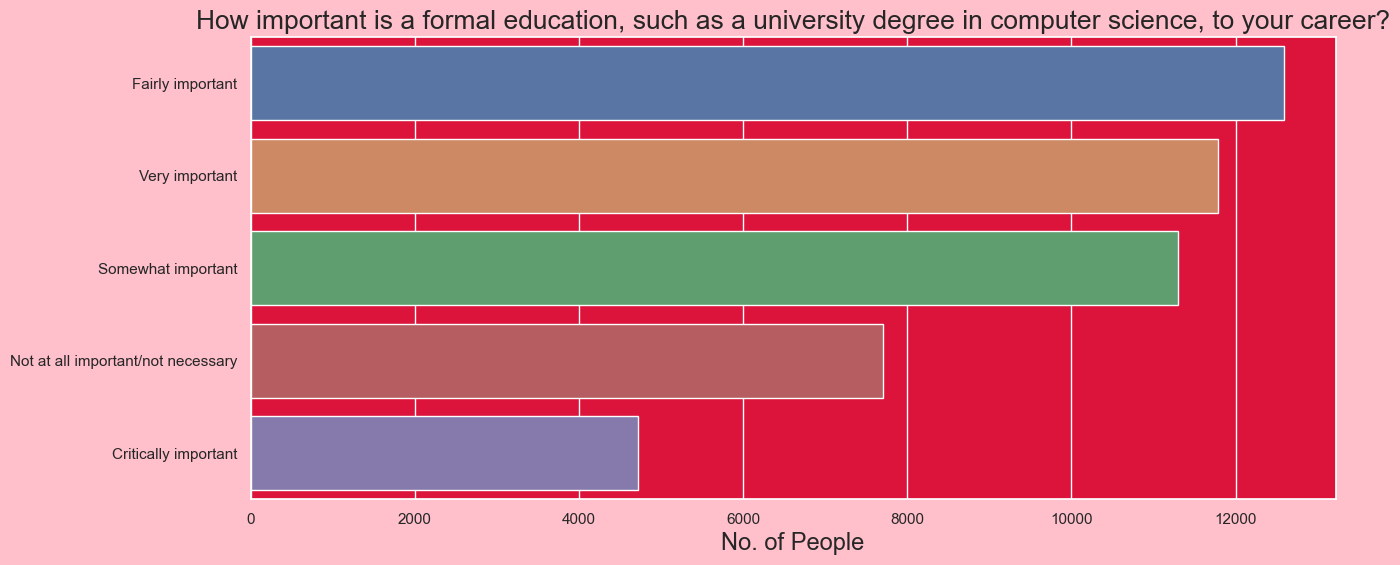

In [27]:
degree = survey_df['NEWEdImpt'].value_counts()

# Visualizing the Results:-
plt.figure(figsize = (14,6))
sns.barplot(x = degree, y = degree.index)
sns.set(rc={'figure.facecolor':'pink', 'axes.facecolor':'crimson'})
plt.title(schema.NEWEdImpt, size = 19)
plt.xlabel('No. of People', size = 17);

#### 07. Breakdown between Full-Time, Part-Time, and Freelance-Work:-

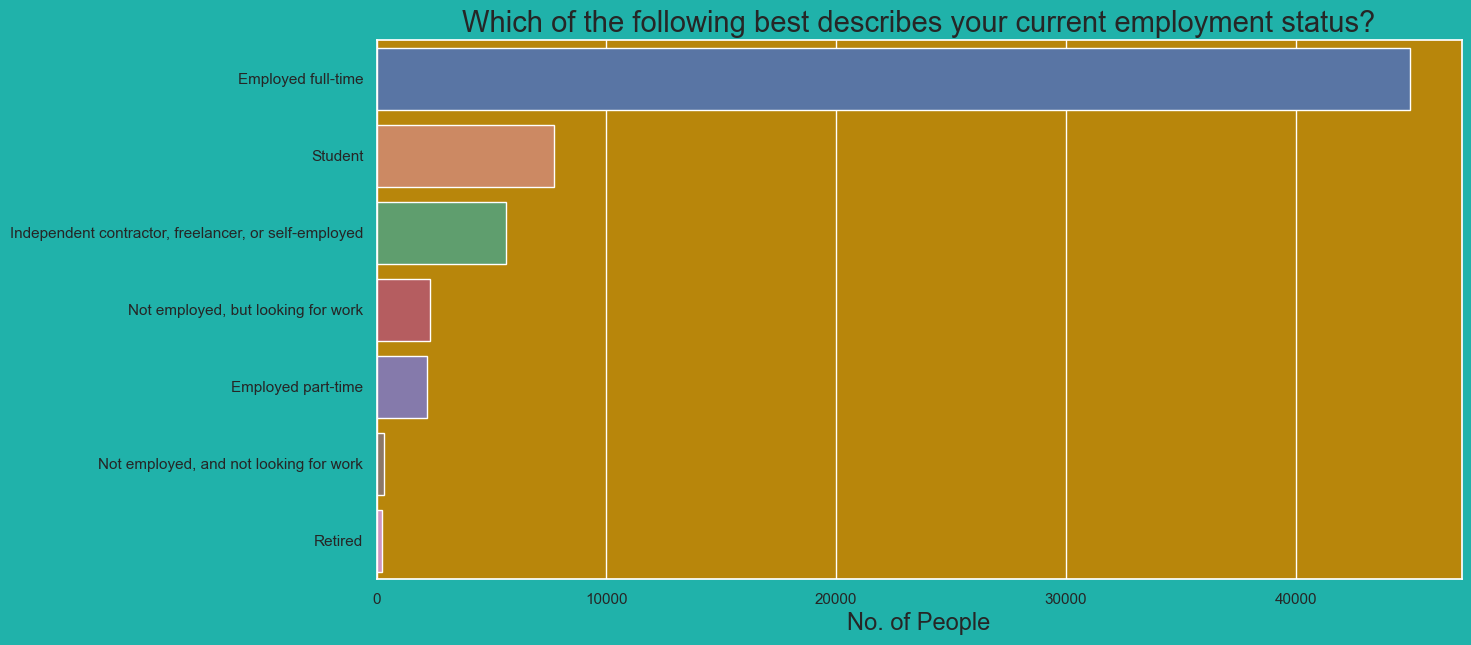

In [29]:
count = survey_df.Employment.value_counts()

# Visualizing the Results:-
plt.figure(figsize=(14,7))
sns.barplot(x = count, y = count.index)
sns.set(rc={'axes.facecolor':'darkgoldenrod', 'figure.facecolor':'lightseagreen'})
plt.title(schema.Employment, size = 21)
plt.xlabel('No. of People', size = 17);

#### 08. Different Roles held by Programmers:-

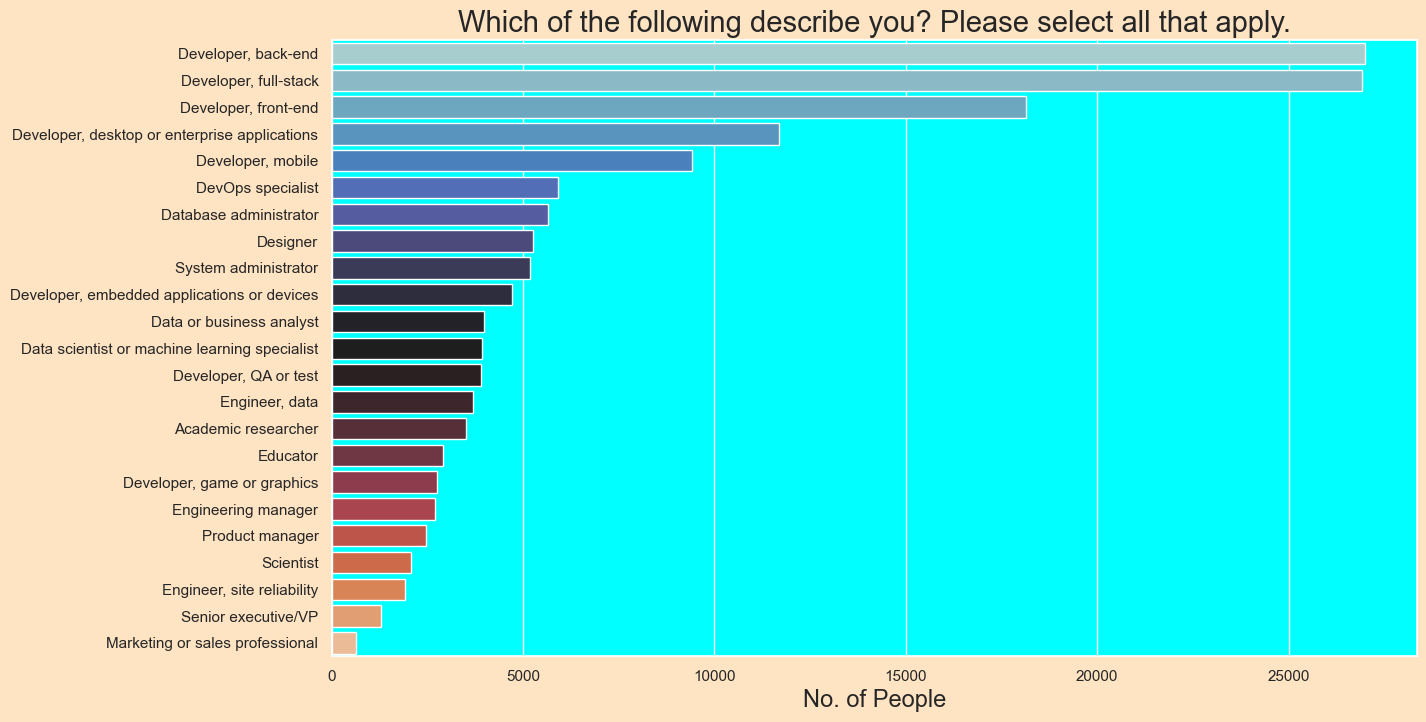

In [31]:
''' The 'DevType' column contains various information, Since the Question allows Multiple Answers;'''

# print(survey_df.DevType.value_counts())

'''Let's define a helper function that turns a column containing lists of values (like 'survey_df.DevType')
into a data frame with One-Column for each possible option.'''

def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

# just See the Power of this Function:-
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals 

# Visualizing the Results:-
plt.figure(figsize=(14,8))
sns.barplot(x =  dev_type_totals, y = dev_type_totals.index, palette='icefire')
sns.set(rc={'axes.facecolor':'aqua', 'figure.facecolor':'bisque'})
plt.title(schema.DevType, size = 21)
plt.xlabel('No. of People', size = 17);

## 04. Asking and Answering Questions

In [32]:
'''We've already gained several Insights about the Respondents and the Programming Community
by Exploring Individual Columns of the Dataset.

Let's ask some Specific Questions and try to Answer them using data-frame Operations & Visualizations.''';

#### Q1. What are the Most-Popular Programming Languages in 2020?

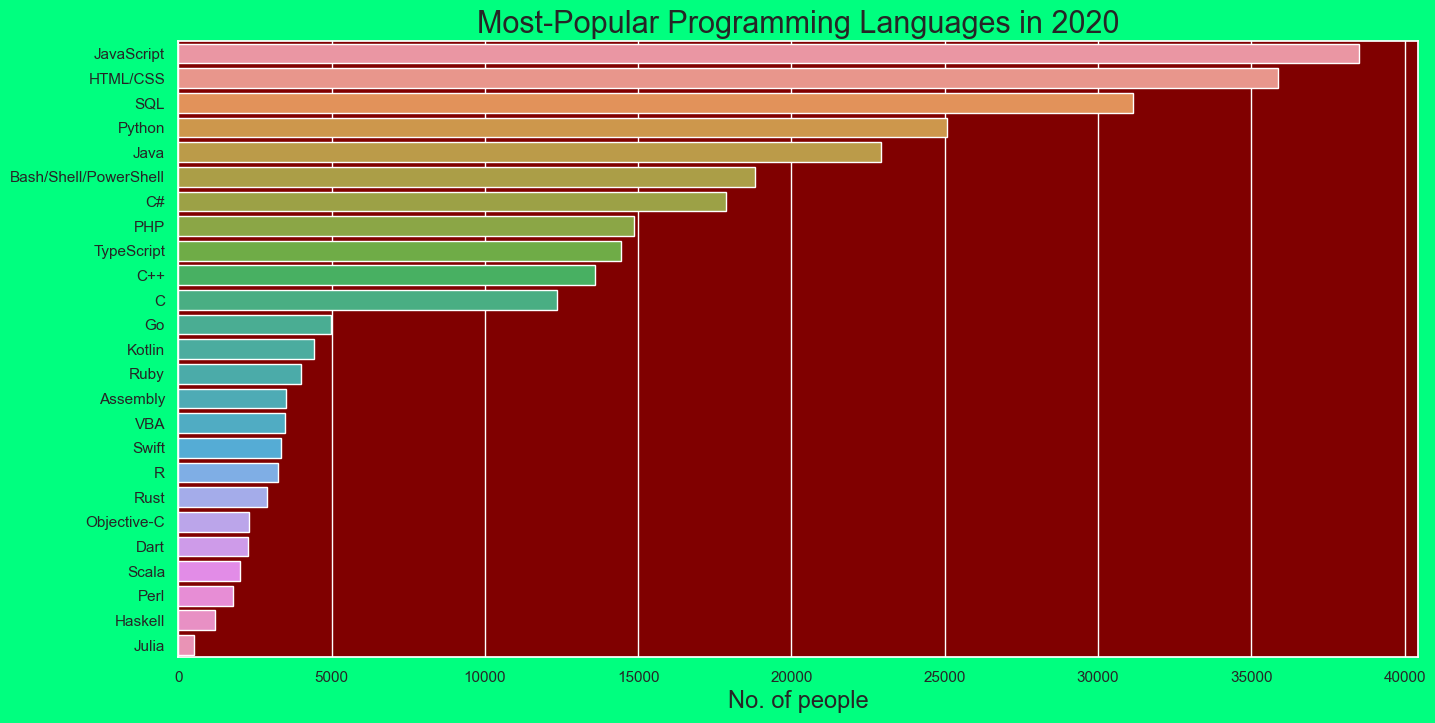

In [34]:
'''To answer, we can use the 'LanguageWorkedWith' column. Similar to 'DevType', respondents were allowed to choose multiple options here.'''

#print(survey_df['LanguageWorkedWith'].value_counts())

languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_total_df = languages_worked_df.sum().sort_values(ascending= False)

# Visualizing the Results:-
plt.figure(figsize=(16,8))
sns.barplot(x = languages_total_df, y = languages_total_df.index)
sns.set(rc={'axes.facecolor':'maroon', 'figure.facecolor':'springgreen'})
plt.title('Most-Popular Programming Languages in 2020', size = 22)
plt.xlabel('No. of people', size = 17);

#### Q2. Which Languages are the Most People Interested to Learn over the Next Year?

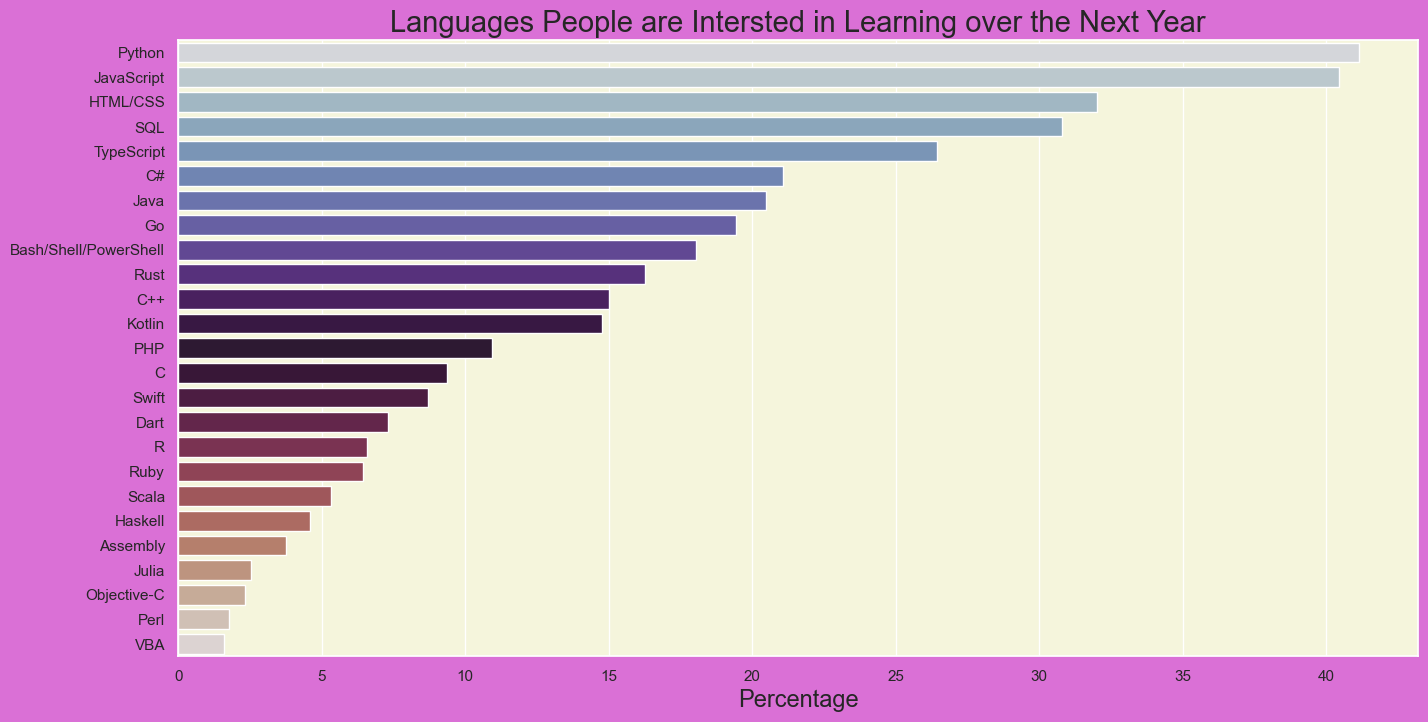

In [36]:
# For this, we can use the 'LanguageDesireNextYear' column, with similar processing as the previous one.
next_language = split_multicolumn(survey_df.LanguageDesireNextYear)
next_language_percentage = next_language.mean().sort_values(ascending= False) * 100

# Visualizing the Results:-
plt.figure(figsize=(16,8))
sns.barplot(x = next_language_percentage, y = next_language_percentage.index, palette='twilight')
sns.set(rc={'axes.facecolor':'beige', 'figure.facecolor':'orchid'})
plt.title("Languages People are Intersted in Learning over the Next Year", size = 21)
plt.xlabel('Percentage', size = 17);

#### Q3. Which are the Most Loved languages; i.e, a High-Percentage of People who have used the language want to Continue Learning & Using it over the Next Year?

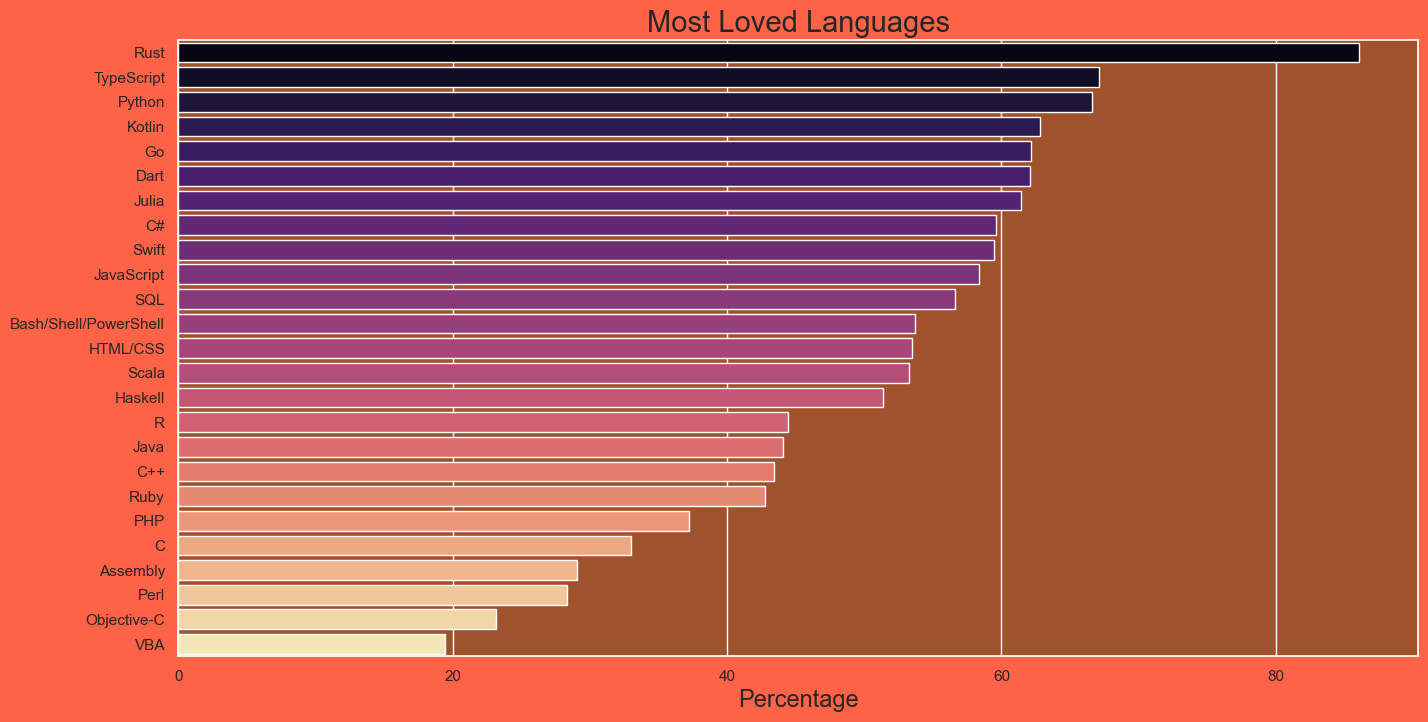

In [38]:
loved_langauges = languages_worked_df & next_language
loved_languages_percentage = (loved_langauges.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

# Visualizing the Results:-
plt.figure(figsize=(16,8))
sns.barplot(x = loved_languages_percentage, y = loved_languages_percentage.index, palette='magma')
sns.set(rc={'axes.facecolor':'sienna', 'figure.facecolor':'tomato'})
plt.title("Most Loved Languages", size = 21)
plt.xlabel('Percentage', size = 17);

### Q4. In which Countries do Developers Work the Highest number of Hours-Per-Week? Consider Top-12 Countries with more than 250 Responses only?

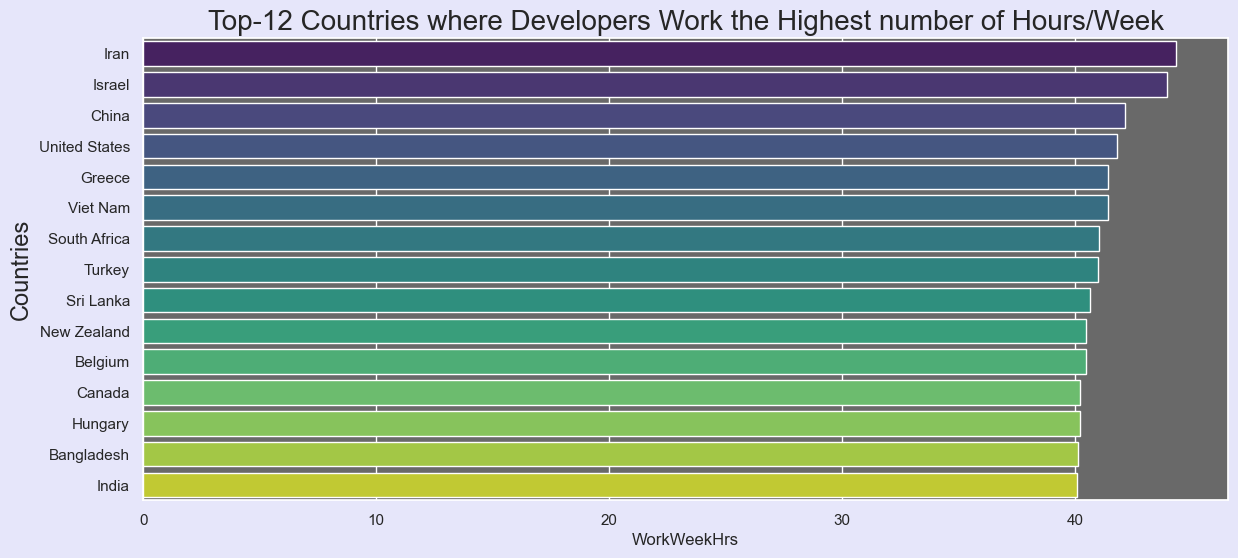

In [40]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

# Visualizing the Results:-
plt.figure(figsize=(14,6))
sns.barplot(x = high_response_countries_df.WorkWeekHrs, y = high_response_countries_df.index, palette='viridis')
sns.set(rc={'figure.facecolor':'lavender', 'axes.facecolor':'dimgray'})
plt.title('Top-12 Countries where Developers Work the Highest number of Hours/Week', size = 20)
plt.ylabel('Countries', size = 17);

#### Q5. How Important is it to Start Young to build a Career in Programming?

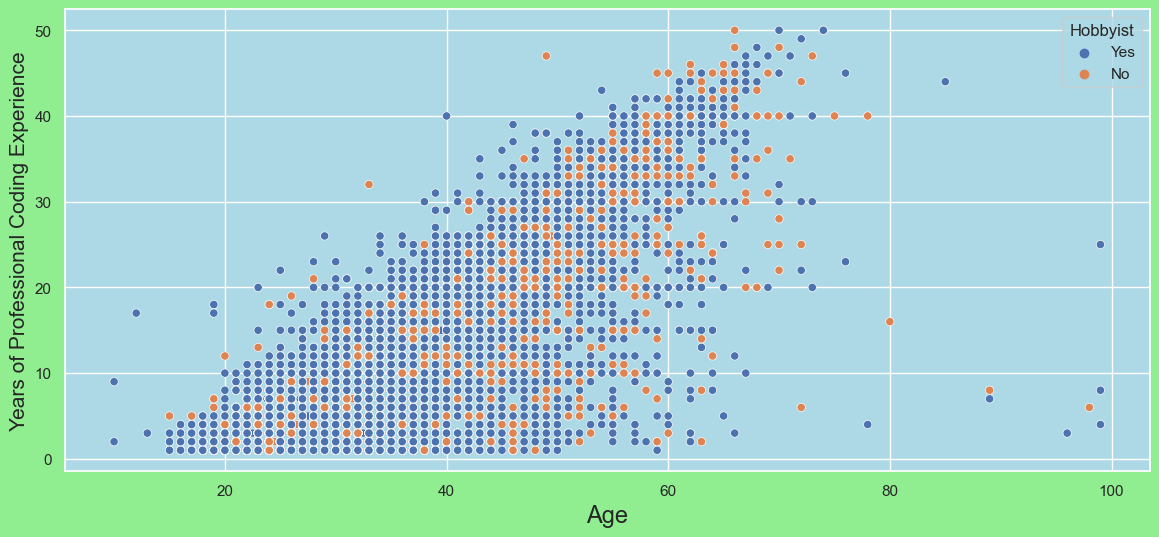

In [42]:
# Visualizing the Results:-
plt.figure(figsize = (14,6))
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
sns.set(rc={'figure.facecolor':'lightgreen', 'axes.facecolor':'lightblue'})
plt.xlabel("Age", size = 17)
plt.ylabel("Years of Professional Coding Experience", size = 15);

#### Q6. At what Age mostly People Try to Code for First Time?

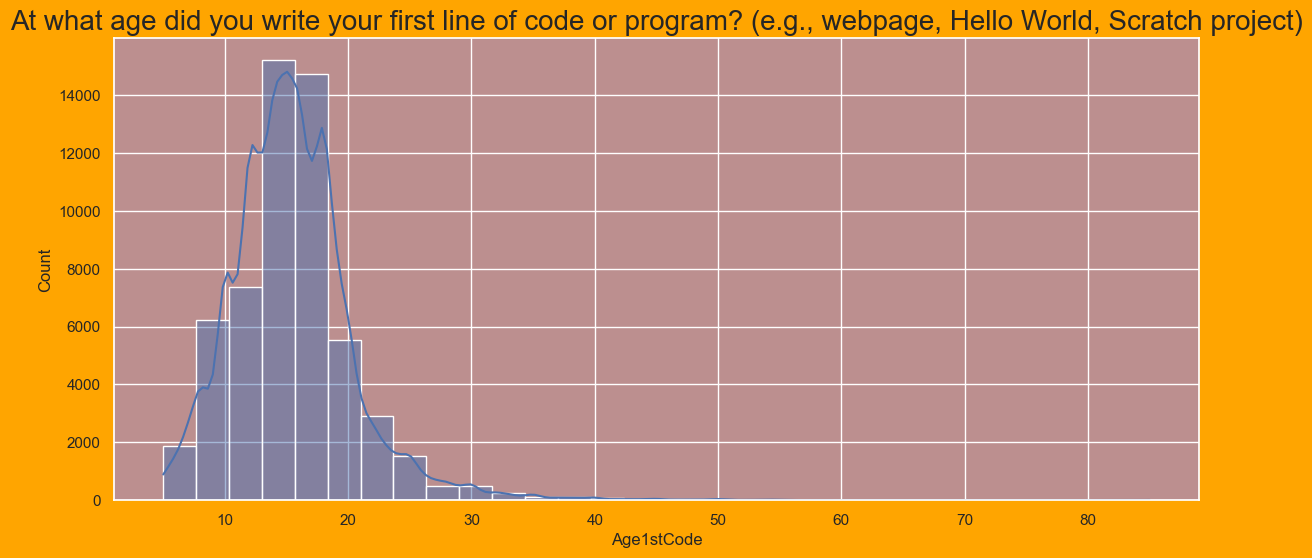

In [44]:
# Visualizing the Results:-
plt.figure(figsize=(14,6))
sns.set(rc={'axes.facecolor':'rosybrown', 'figure.facecolor':'orange'})
plt.title(schema.Age1stCode, size = 20)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

## 05. Inferences and Conclusions

In [45]:
'''We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community.
However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving,
we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.

- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major.
Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field,
especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language,
well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities.
Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.''';